# Noise PSDs by USRP Power
## Import the libraries

In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

## Load some parameters

In [2]:
## MB Results come from fitting a temperature scan at a specified RF power
use_nexus_MBvals = False

if use_nexus_MBvals:
    ## As measured in NEXUS
    MB_fit_vals = np.array([4.24216+9.75e-6, 
                            0.177  ,
                            0.0125 ,
                            4.1e7  ]) ## [ F0 [GHz] , Delta [meV] , alpha , Qi0 ]
else:
    ## As measured on Caltech sister device (https://arxiv.org/pdf/2111.08064.pdf)
    MB_fit_vals = np.array([4.24201000, 
                            0.184     ,
                            0.03801   ,
                            4.05538e5 ]) ## [ F0 [GHz] , Delta [meV] , alpha , Qi0 ]
    
## How much attenuation is in the lines before the chip
# line_atten_dB_NEXUS = 56.5
line_atten_dB_NEXUS = 60

## Define the noise runs in power order

In [3]:
## 11/8 Al Runs - Shield Closed, No Laser, No sources (NR 15)
series_list = np.array([
    "20221108_093729",
    "20221108_093600",
    "20221108_093431",
    "20221108_093301",
    "20221108_093132",
    "20221108_093003",
    "20221108_092834",
    "20221108_092702",
    "20221108_092534",
    "20221108_092406",
    "20221108_092238",
    "20221108_092104",
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [4]:
## 2/12/23 Al Runs - Shield Closed, No Laser, No sources (NR 17)
series_list = np.array([
    "20230212_224409",
    "20230212_224240",
    "20230212_224111",
    "20230212_223942",
    "20230212_223813",
    "20230212_223644",
    "20230212_223515",
    "20230212_223346",
    "20230212_223217",
    "20230212_223049",
    "20230212_222921",
    "20230212_222746",
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [5]:
## 2/22/23 Nb7 Runs - Shield Closed, No Laser, No sources (NR 17)
series_list = np.array([
    "20230222_155910", 
    "20230222_155740", 
    "20230222_155610", 
    "20230222_155440", 
    "20230222_155310", 
    "20230222_155140", 
    "20230222_155010", 
    "20230222_154840", 
    "20230222_154711", 
    "20230222_154542", 
    "20230222_154413", 
    "20230222_154237"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [6]:
# series_list = series_list[2:-3][::-1]
# powers_list = powers_list[2:-3][::-1]

# series_list = series_list[1:-5][::-1]
# powers_list = powers_list[1:-5][::-1]

series_list = series_list[::-1]
powers_list = powers_list[::-1]

In [7]:
pwr_on_chip = powers_list - line_atten_dB_NEXUS

In [8]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i],"/",pwr_on_chip[i], "dBm")

20230222_154237 : -70 / -130 dBm
20230222_154413 : -65 / -125 dBm
20230222_154542 : -60 / -120 dBm
20230222_154711 : -55 / -115 dBm
20230222_154840 : -50 / -110 dBm
20230222_155010 : -45 / -105 dBm
20230222_155140 : -40 / -100 dBm
20230222_155310 : -35 / -95 dBm
20230222_155440 : -30 / -90 dBm
20230222_155610 : -25 / -85 dBm
20230222_155740 : -20 / -80 dBm
20230222_155910 : -15 / -75 dBm


## Load the metadata

In [9]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[0], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)

Line Delay file:  USRP_Delay_20230222_154237.h5
VNA scan file:    USRP_VNA_20230222_154237.h5
Noise ts files:   ['USRP_Noise_20230222_154237_delta0.h5']
Laser ts files:   []
Summary file:	 noise_averages_20230222_154237.h5
[4244.556036 4244.556758 4244.55748 ] [0.00019926+5.28302454e-05j 0.00017926+7.06773030e-05j
 0.00016424+9.47930125e-05j]


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


## Show an example timestream and PSD

In [10]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = None, #MB_fit_vals,
                                               show_plots = False,
                                               verbose = False)
print(np.array(res.keys()))

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154237/USRP_Noise_20230222_154237_delta0.h5 because override=True!
found 19 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154237/USRP_Noise_20230222_154237_delta0_cleaned.h5 because override=True!
Converting to resonator basis!
dict_keys(['fr', 'Qr', 'Qc', 'a', 'phi'])


In [11]:
print(",".join(res.keys()))
print(str(res.values()).split("[")[1].split("]")[0].replace(' ',''))

fr,Qr,Qc,a,phi
4244.556757928172,293965.4339540051,524629.2295100634,(0.0003825002353182148+0.00022724322848173754j),0.07010260972182492


## Calculate and plot PSDs for every power

In [12]:
%matplotlib notebook

In [13]:
f_interst = [1.0e3]

<IPython.core.display.Javascript object>


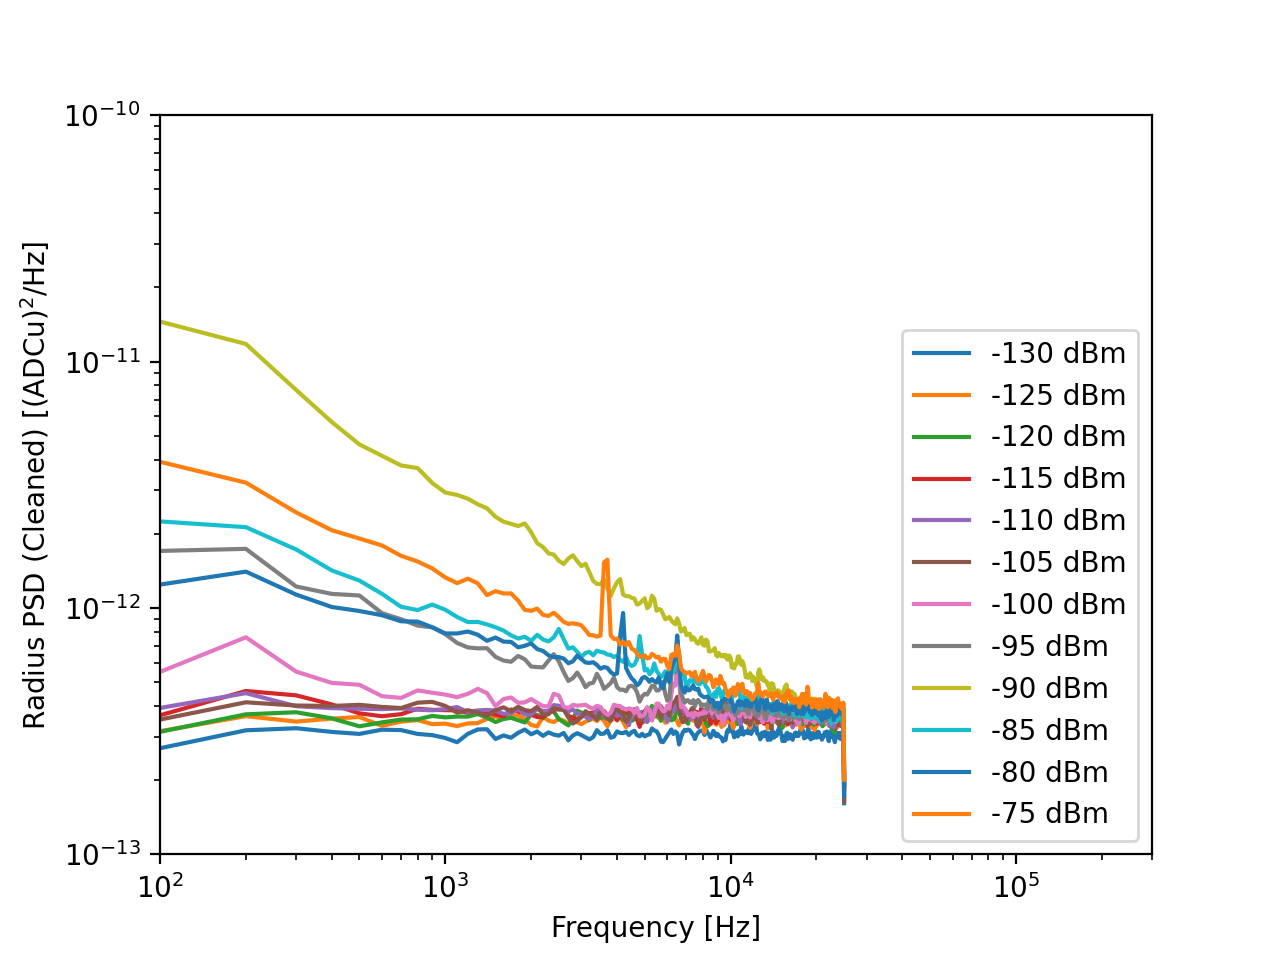

<IPython.core.display.Javascript object>


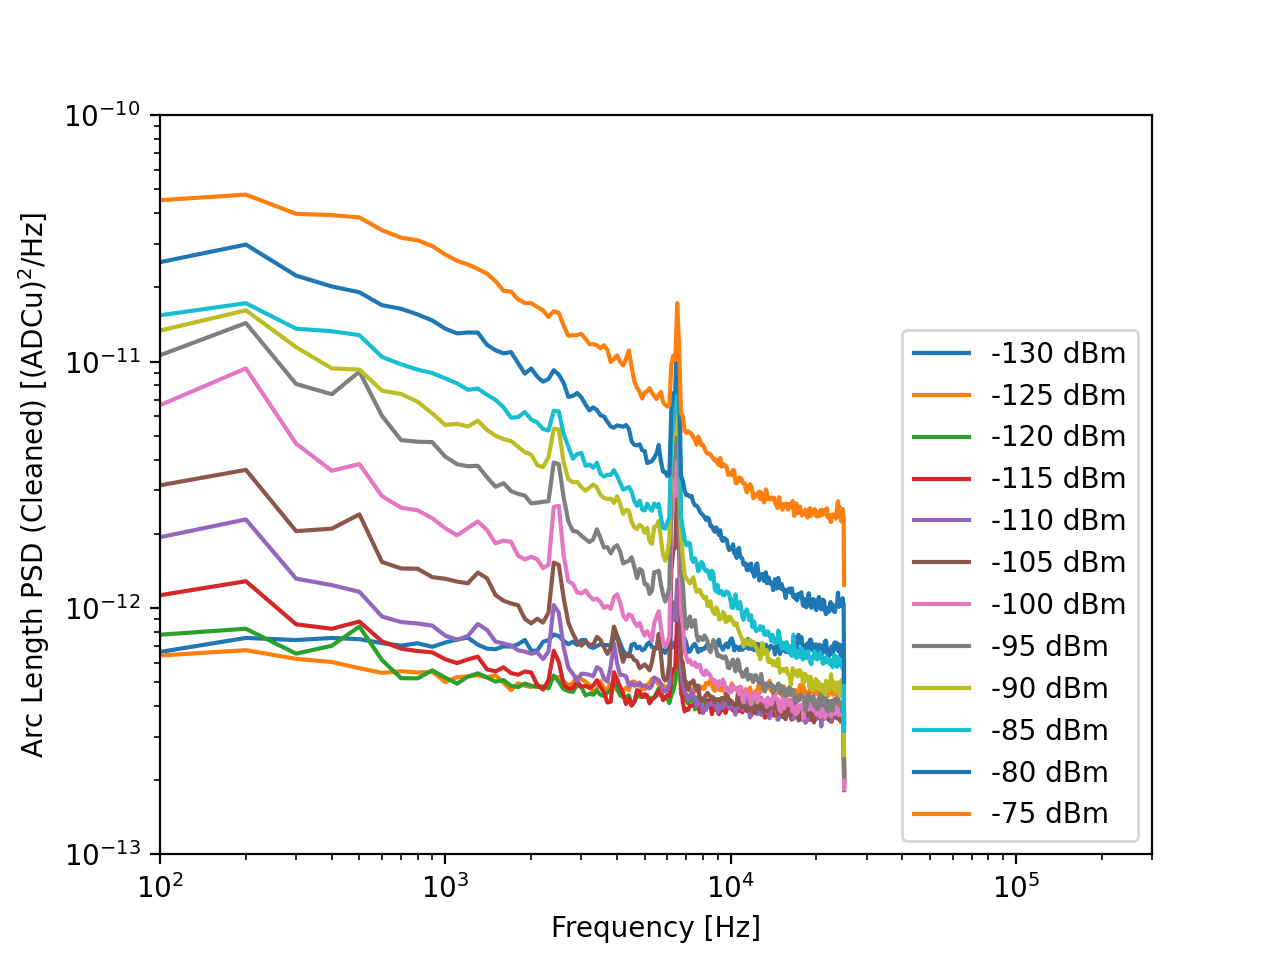

<IPython.core.display.Javascript object>


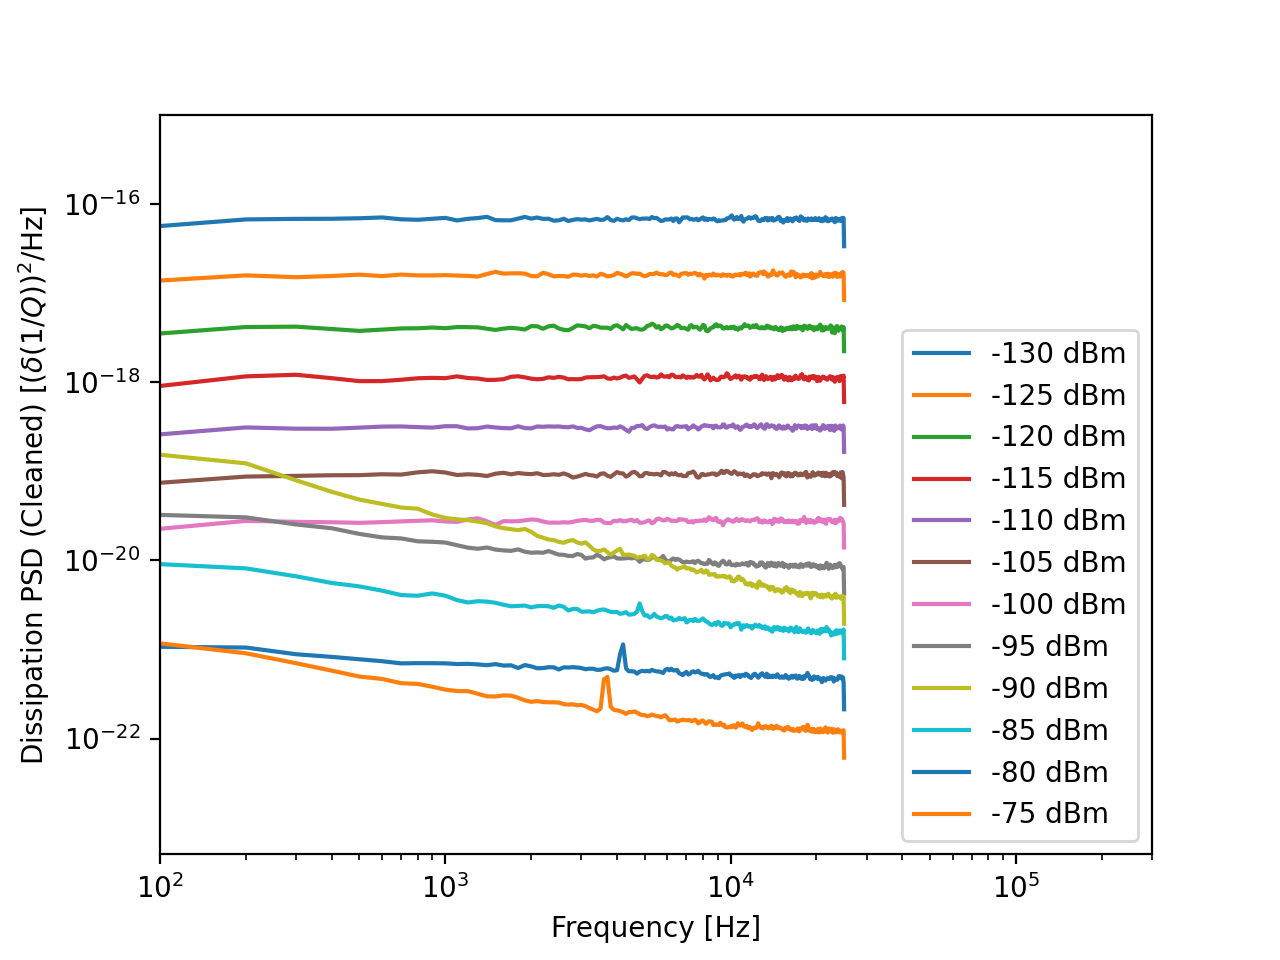

<IPython.core.display.Javascript object>


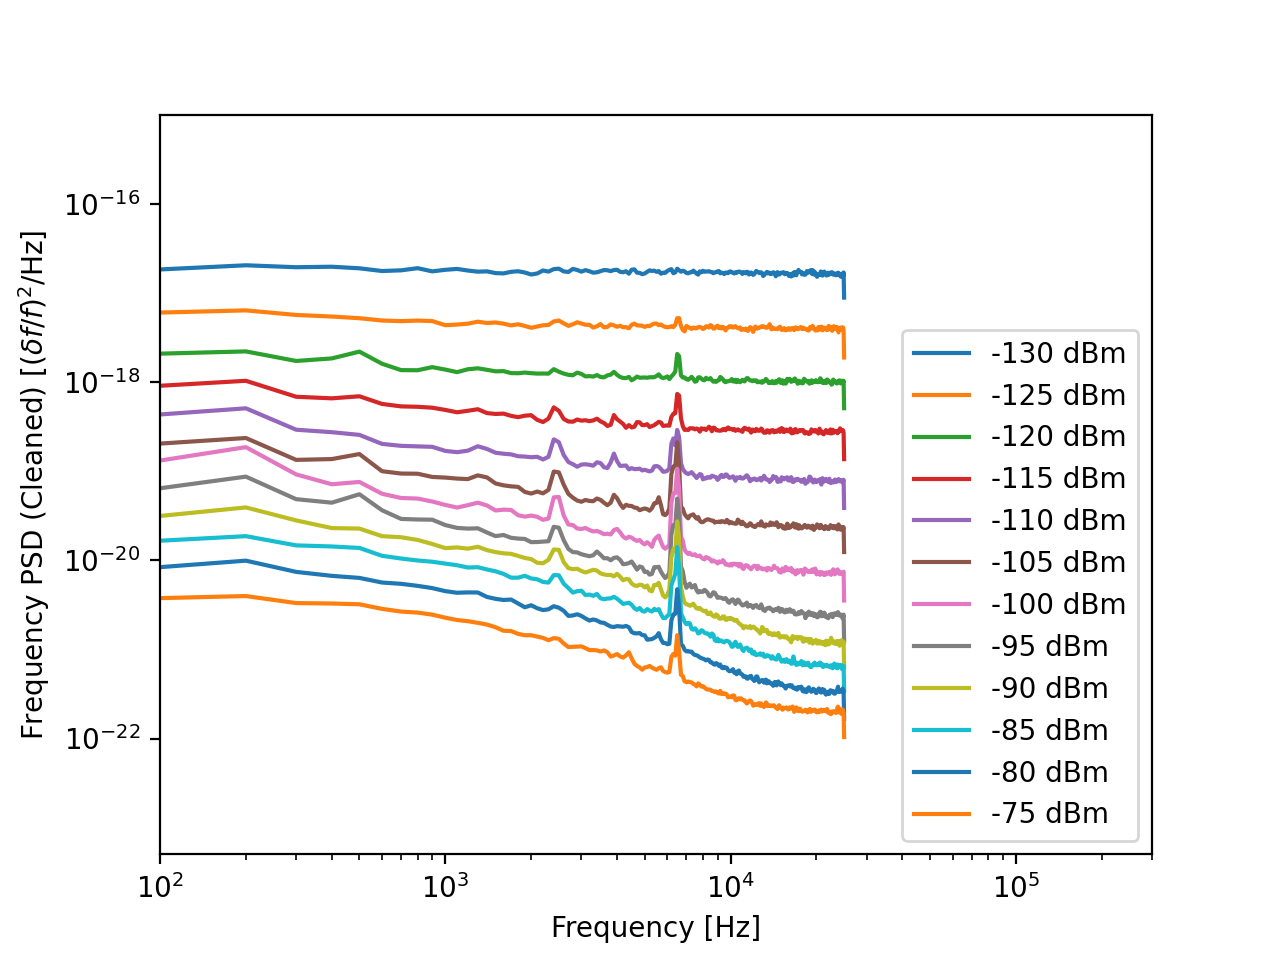

pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154237/USRP_Noise_20230222_154237_delta0.h5 because override=True!
found 19 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154237/USRP_Noise_20230222_154237_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154413/USRP_Noise_20230222_154413_delta0.h5 because override=True!
found 10 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154413/USRP_Noise_20230222_154413_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154542/USRP_Noise_20230222_154542_delta0.h5 because override=True!
found 13 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154542/USRP_Noise_20230222_154542_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154711/USRP_Noise_20230222_154711_delta0.h5 because override=True!
found 6 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154711/USRP_Noise_20230222_154711_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_154840/USRP_Noise_20230222_154840_delta0.h5 because override=True!
found 4 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_154840/USRP_Noise_20230222_154840_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155010/USRP_Noise_20230222_155010_delta0.h5 because override=True!
found 5 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155010/USRP_Noise_20230222_155010_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155140/USRP_Noise_20230222_155140_delta0.h5 because override=True!
found 7 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155140/USRP_Noise_20230222_155140_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155310/USRP_Noise_20230222_155310_delta0.h5 because override=True!
found 9 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155310/USRP_Noise_20230222_155310_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155440/USRP_Noise_20230222_155440_delta0.h5 because override=True!
found 118 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155440/USRP_Noise_20230222_155440_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155610/USRP_Noise_20230222_155610_delta0.h5 because override=True!
found 92 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155610/USRP_Noise_20230222_155610_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155740/USRP_Noise_20230222_155740_delta0.h5 because override=True!
found 7 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155740/USRP_Noise_20230222_155740_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


/home/nexus-admin/NEXUS_RF/BackendTools/TimestreamHelperFunctions.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l_dict[kk] = md[k][kk].value


pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20230222/20230222_155910/USRP_Noise_20230222_155910_delta0.h5 because override=True!
found 17 pulses
computed electronics basis
cleaning...
saving clean_data to /data/USRP_Noise_Scans/20230222/20230222_155910/USRP_Noise_20230222_155910_delta0_cleaned.h5 because override=True!
Converting to resonator basis!


In [14]:
psd_interst = Thf.PlotPSDsByPower(series_list, pwr_on_chip, 
    fHz_range     = [1e2,3e5],
    e_b_PSDrange  = [1e-13,1e-10], 
    r_b_PSDrange  = [5e-24,1e-15],
#     q_b_PSDrange  = [2e-5,2e-1],
    q_b_PSDrange  = [7e-6,1e1],
    MB_fit_result = None, # MB_fit_vals,
    PSD_lo_f      = 1e2, 
    PSD_hi_f      = 5e4, 
    f_transient   = 0.2,
    f_data        = f_interst,
    verbose       = False,
    psd_to_file   = True,
    res_to_file   = True,
)

In [ ]:
print(psd_interst)

## Read in the Caltech PSD data

In [ ]:
# path  = "/data/Misc"
# f_pfx = "LTD19 "
# f_sfx = " noise qp.csv"

# k1_data = np.loadtxt(os.path.join(path,f_pfx+"k1"+f_sfx), delimiter=",", skiprows=1)
# k2_data = np.loadtxt(os.path.join(path,f_pfx+"k2"+f_sfx), delimiter=",", skiprows=1)

# caltech_powers = np.array([-80])
# caltech_powers = np.arange(start=-110, stop=-75, step=5)
# print(caltech_powers)

In [ ]:
path  = "/data/Misc"
f_pfx = "LTD19 "
f_sfx = " noise qp.csv"

k1_data = pd.read_csv(os.path.join(path,f_pfx+"k1"+f_sfx), sep=",", header=0, index_col=False)
k2_data = pd.read_csv(os.path.join(path,f_pfx+"k2"+f_sfx), sep=",", header=0, index_col=False)

line_atten_dB_caltech = 70

In [ ]:
caltech_powers = np.array(k1_data.keys())[1:].astype(int)
caltech_powers = caltech_powers - line_atten_dB_caltech
print(caltech_powers)

In [ ]:
## Count how many columns of PSDs there are
n_psd_cols = len(caltech_powers)

## Loop over every PSD (by power)
# for i in np.arange(n_psd_cols)+1:
for i in np.arange(n_psd_cols-1)+2:
    ## Pull the right column
    this_k1_data = k1_data[k1_data.keys()[i]]
    this_k2_data = k2_data[k2_data.keys()[i]]
    
    ## Pick the color
#     c = "C" + str(i-1)
    c = "C" + str(i-2)
    
    ## Add the k1 data to the right plot
    ax1 = plt.figure(5).gca()
    ax1.plot(k1_data['freq'],this_k1_data,color=c,ls='--',label="Caltech "+str(caltech_powers[i-1])+" dBm")
    
    ## Add the k2 data to the right plot
    ax2 = plt.figure(6).gca()
    ax2.plot(k2_data['freq'],this_k2_data,color=c,ls='--',label="Caltech "+str(caltech_powers[i-1])+" dBm")
    
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

## Check the readout frequencies for each power

In [ ]:
for i in np.arange(len(series_list)):
    sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[i], verbose=False)
    metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
    print(series_list[i],"(",pwr_on_chip[i],"dBm) f_r:", avg_frqs[0], "MHz")

## Investigate TLS contribution

In [ ]:
def dBm_to_mW(dBm):
    return 1.0 * np.power(10,dBm/10)

In [ ]:
df_f_PSD_pts = np.zeros(len(pwr_on_chip))

for i in np.arange(len(pwr_on_chip)):
    d = psd_interst[pwr_on_chip[i]][0]
    df_f_PSD_pts[i] = d[4]
    print(pwr_on_chip[i],d[0],d[4],dBm_to_mW(pwr_on_chip[i]))

In [ ]:
fig = plt.figure()
ax1 = fig.gca()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r"$S_\mathrm{TLS}(\nu=1$ kHz) $\left[ \frac{(df/f)^2}{\mathrm{Hz}} \right]$")
ax1.set_xlabel("Power on chip [mW]")

for i in np.arange(len(pwr_on_chip)):
    ax1.scatter(dBm_to_mW(pwr_on_chip[i]),df_f_PSD_pts[i],marker='s',color='C'+str(i))

In [ ]:
from scipy.optimize import curve_fit

def pow_law(x,A,n):
    return A * np.power(x,n)

line = lambda lx,la,k: la + k*lx

# lx_data = np.log10(dBm_to_mW(pwr_on_chip[pwr_on_chip != -106.5]))
# ly_data = np.log10(df_f_PSD_pts[pwr_on_chip != -106.5])

lx_data = np.log10(dBm_to_mW(pwr_on_chip))[-4:]
ly_data = np.log10(df_f_PSD_pts)[-4:]

popt, pcov = curve_fit(line,lx_data,ly_data,p0=[-25,-0.5])

ax1 = plt.figure().gca()
ax1.set_xlabel(r"$\log_{10}(P_\mathrm{chip}/\mathrm{mW})$")
ax1.set_ylabel(r"$\log_{10}\left(S_\mathrm{TLS}(\nu=1 ~\mathrm{kHz}) / \left[ \frac{(df/f)^2}{\mathrm{Hz}} \right] \right)$")
ax1.scatter(lx_data,ly_data,marker='s',color='C0')

xlims = ax1.get_xlim()
xvals = np.linspace(start=xlims[0],stop=xlims[1],num=5)
yvals = line(xvals,popt[0],popt[1])
ax1.plot(xvals,yvals,'r--',label=r"fit $P^{"+str(int(100.0*popt[1])/100.0)+"}$")
ax1.legend()
ax1.set_xlim(xlims)

print("k=", popt[1])
print("a=", 10**popt[0])

In [ ]:
fig = plt.figure()
ax1 = fig.gca()
ax1.set_yscale('log')
ax1.set_ylabel(r"$S_\mathrm{TLS}(\nu=1$ kHz) $\left[ \frac{(df/f)^2}{\mathrm{Hz}} \right]$")
ax1.set_xlabel("Power on chip [dBm]")

for i in np.arange(len(pwr_on_chip)):
    ax1.scatter(pwr_on_chip[i],df_f_PSD_pts[i],marker='s',color='C'+str(i))
    
xlims = ax1.get_xlim()
xvals = np.linspace(start=xlims[0],stop=xlims[1],num=10)
yvals = pow_law(dBm_to_mW(xvals),10**popt[0],popt[1])
ax1.plot(xvals,yvals,'r--',label=r"fit $P^{"+str(int(100*popt[1])/100.)+"}$")

# ax1.plot(xvals,pow_law(dBm_to_mW(xvals),3.0e-24,-0.47),'r:',alpha=0.5,label=r"Guess $P^{-0.47}$")
# ax1.plot(xvals,pow_law(dBm_to_mW(xvals),0.8e-23,-0.43),'b:',alpha=0.5,label=r"Guess $P^{-0.43}$")
# ax1.plot(xvals,pow_law(dBm_to_mW(xvals),5.5e-25,-0.55),'g:' ,alpha=0.5,label=r"$P^{-0.55}$")

ax1.set_xlim(xlims)
ax1.legend()